In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# input/lapchart/year(2012,2013...)

path = './input/lapchart/'  #ディレクトリ一覧を取得したいディレクトリ

df = pd.DataFrame()

for year in os.listdir(path):  
    dir_path = path + year
    if not(os.path.isdir(dir_path)):
        continue
#    print('year=',year,",path=",dir_path)
    dir_path = dir_path + "/"
    for course in os.listdir(dir_path):
        file_path = dir_path + course
        if not(os.path.isfile(file_path)):
            continue
        course = course.replace('.txt','')
#        print('course=',course,',file_path=',file_path)
        
        f = open(file_path, 'r')
        line = f.readline()
        pre_chart = []
        lap = 0
        point = 0
        
        while line:
            line = f.readline()
            now_chart = line.strip().split(' ')
            del now_chart[0]
            # 末尾に空行が入っているので除外
            if len(now_chart) == 0:
                continue
            if len(pre_chart) > 3:
                if pre_chart[0] != now_chart[0]:
                    point = point + 2
                if pre_chart[1] != now_chart[1]:
                    point = point + 1
                if pre_chart[2] != now_chart[2]:
                    point = point + 1
                
            pre_chart = now_chart.copy()
            lap = lap + 1
        f.close()
        
        key_value = {}
        key_value['year'] = year
        key_value['course'] = course
        key_value['point'] = point
        key_value['lap'] = lap
        key_value['pointPerLap'] = point / lap

        series = pd.Series(list(key_value.values()), index=key_value.keys())
        df = df.append(series, ignore_index = True)


df


,course,lap,point,pointPerLap,year
0,マレーシア,19.0,5.0,0.263158,2013
1,バレンシア,29.0,11.0,0.379310,2013
2,日本,23.0,0.0,0.000000,2013
3,カタルーニャ,24.0,0.0,0.000000,2013
4,ドイツ,29.0,11.0,0.379310,2013
5,イタリア,22.0,4.0,0.181818,2013
6,サンマリノ,27.0,4.0,0.148148,2013
7,オランダ,25.0,8.0,0.320000,2013
8,スペイン,26.0,5.0,0.192308,2013
9,アラゴン,22.0,9.0,0.409091,2013


In [24]:
temp = df.sort_values('pointPerLap',ascending=False)
temp.head()

,course,lap,point,pointPerLap,year
88,オーストラリア,26.0,47.0,1.807692,2017
97,オランダ,25.0,45.0,1.800000,2018
26,アラゴン,22.0,25.0,1.136364,2014
42,サンマリノ,27.0,29.0,1.074074,2015
111,ドイツ,29.0,31.0,1.068966,2016


In [64]:
grouped = df.groupby('course')
grouped.describe()

lap                                                     point  \
          count       mean       std   min   25%   50%    75%   max count   
course                                                                      
アメリカズ       6.0  19.833333  0.408248  19.0  20.0  20.0  20.00  20.0   6.0   
アラゴン        7.0  22.000000  0.000000  22.0  22.0  22.0  22.00  22.0   7.0   
アルゼンチン      5.0  22.800000  2.167948  19.0  23.0  24.0  24.00  24.0   5.0   
イギリス        6.0  18.833333  0.408248  18.0  19.0  19.0  19.00  19.0   6.0   
イタリア        7.0  22.000000  0.000000  22.0  22.0  22.0  22.00  22.0   7.0   
インディアナポリス   4.0  26.250000  0.500000  26.0  26.0  26.0  26.25  27.0   4.0   
オランダ        7.0  25.000000  0.000000  25.0  25.0  25.0  25.00  25.0   7.0   
オーストラリア     7.0  24.857143  3.023716  18.0  26.0  26.0  26.00  26.0   7.0   
オーストリア      3.0  27.000000  0.000000  27.0  27.0  27.0  27.00  27.0   3.0   
カタルーニャ      7.0  23.857143  0.377964  23.0  24.0  24.0  24.00  24.0   7.0   
カタール        7.0  20.714286  0.755929  19.0  21.0  21.0  21.00  21.0   7.0   
サンマリノ       7.0  26.714286  0.487950  26.0  26.5  27.0  27.00  27.0   7.0   
スペイン        7.0  25.714286  0.755929  24.0  26.0  26.0  26.00  26.0   7.0   
タイ          1.0  25.000000       NaN  25.0  25.0  25.0  25.00  25.0   1.0   
チェコ         6.0  21.000000  0.000000  21.0  21.0  21.0  21.00  21.0   6.0   
ドイツ         7.0  29.000000  0.000000  29.0  29.0  29.0  29.00  29.0   7.0   
バレンシア       7.0  28.571429  1.133893  26.0  29.0  29.0  29.00  29.0   7.0   
フランス        7.0  26.857143  0.377964  26.0  27.0  27.0  27.00  27.0   7.0   
ポルトガル       1.0  27.000000       NaN  27.0  27.0  27.0  27.00  27.0   1.0   
マレーシア       7.0  17.857143  2.609506  12.0  18.5  19.0  19.00  19.0   7.0   
ラグナセカ       2.0  31.000000  0.000000  31.0  31.0  31.0  31.00  31.0   2.0   
日本          7.0  23.000000  0.000000  23.0  23.0  23.0  23.00  23.0   7.0   

                        ...                pointPerLap                      \
                mean    ...      75%   max       count      mean       std   
course                  ...                                                  
アメリカズ       3.500000    ...      4.5   7.0         6.0  0.175877  0.107688   
アラゴン       11.714286    ...     14.0  25.0         7.0  0.532468  0.332693   
アルゼンチン     12.800000    ...     13.0  20.0         5.0  0.569088  0.209857   
イギリス        9.666667    ...     12.0  13.0         6.0  0.515107  0.167403   
イタリア        8.285714    ...     11.0  18.0         7.0  0.376623  0.242965   
インディアナポリス   6.750000    ...      7.0   7.0         4.0  0.257123  0.018187   
オランダ       17.571429    ...     23.5  45.0         7.0  0.702857  0.572646   
オーストラリア    19.428571    ...     25.0  47.0         7.0  0.783883  0.573658   
オーストリア     12.000000    ...     13.5  18.0         3.0  0.444444  0.192450   
カタルーニャ      8.142857    ...     12.5  14.0         7.0  0.339545  0.241905   
カタール       13.857143    ...     18.0  20.0         7.0  0.673469  0.269975   
サンマリノ       9.428571    ...      9.5  29.0         7.0  0.351241  0.338394   
スペイン        4.142857    ...      5.0  12.0         7.0  0.164835  0.170152   
タイ         12.000000    ...     12.0  12.0         1.0  0.480000       NaN   
チェコ         9.000000    ...     14.0  18.0         6.0  0.428571  0.331286   
ドイツ        12.142857    ...     10.5  31.0         7.0  0.418719  0.291530   
バレンシア      10.714286    ...     14.0  20.0         7.0  0.374574  0.216626   
フランス       11.142857    ...     14.0  22.0         7.0  0.415344  0.240469   
ポルトガル       0.000000    ...      0.0   0.0         1.0  0.000000       NaN   
マレーシア       6.428571    ...      8.0   9.0         7.0  0.355263  0.098171   
ラグナセカ       5.000000    ...      5.0   5.0         2.0  0.161290  0.000000   
日本          7.571429    ...      9.5  16.0         7.0  0.329193  0.218630   

                                                             
                min       25%       50%       75%       max  
course     

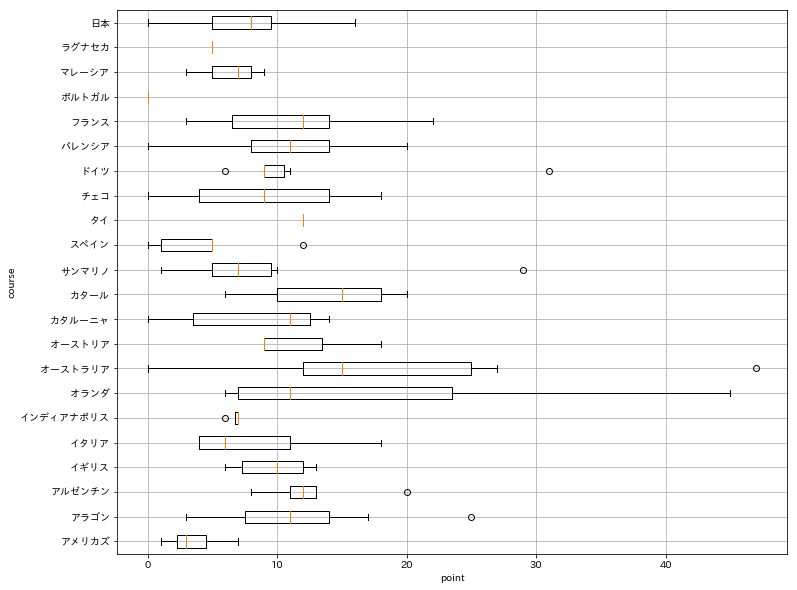

In [69]:
Y = []
target_label = 'point'
labels = []
for group in grouped:
    labels.append(group[0])
    Y.append(group[1][target_label])
    
fig,ax = plt.subplots(figsize=(12,10))
ax.boxplot(Y,labels=labels,vert=False)
plt.xlabel(target_label)
plt.ylabel('course')
plt.grid(True)
plt.show()

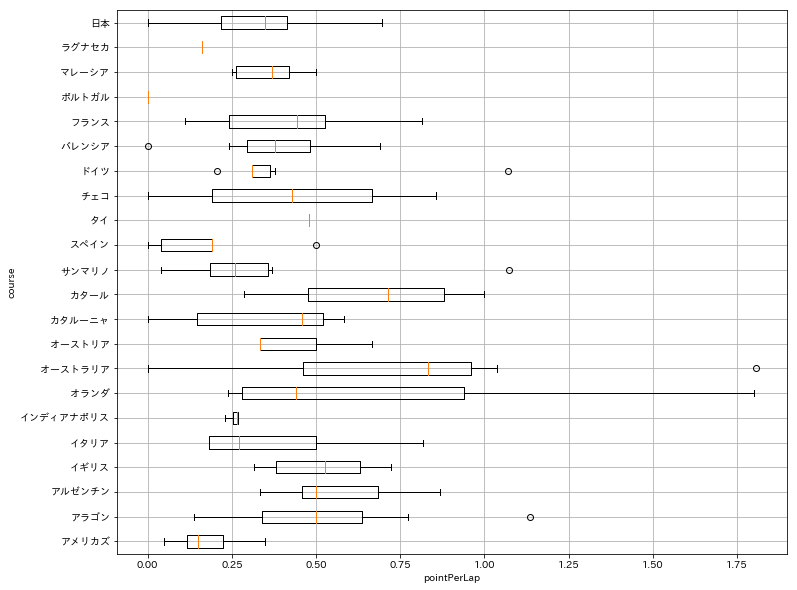

In [70]:
Y = []
target_label = 'pointPerLap'
labels = []
for group in grouped:
    labels.append(group[0])
    Y.append(group[1][target_label])
    
fig,ax = plt.subplots(figsize=(12,10))
ax.boxplot(Y,labels=labels,vert=False)
plt.xlabel(target_label)
plt.ylabel('course')
plt.grid(True)
plt.show()

In [46]:
grouped.get_group('日本')

,course,lap,point,pointPerLap,year
2,日本,23.0,0.0,0.000000,2013
20,日本,23.0,6.0,0.260870,2014
38,日本,23.0,8.0,0.347826,2015
56,日本,23.0,4.0,0.173913,2012
74,日本,23.0,16.0,0.695652,2017
92,日本,23.0,10.0,0.434783,2018
109,日本,23.0,9.0,0.391304,2016


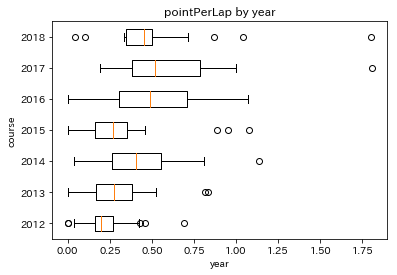

In [50]:
year_grouped = df.groupby('year')
Y = []
labels = []
for group in year_grouped:
    labels.append(group[0])
    Y.append(group[1]['pointPerLap'])
    
fig,ax = plt.subplots()
ax.boxplot(Y,labels=labels,vert=False)
plt.xlabel('year')
plt.ylabel('course')
plt.title('pointPerLap by year')
plt.show()

In [52]:
test_grouped = df.groupby('year').sum().reset_index()
test_grouped.sort_values('point', ascending=False)

,year,lap,point,pointPerLap
5,2017,429.0,265.0,11.203193
6,2018,406.0,223.0,9.231903
4,2016,424.0,211.0,9.010478
2,2014,430.0,182.0,7.789662
3,2015,430.0,149.0,6.235955
1,2013,429.0,133.0,5.679758
0,2012,437.0,103.0,4.302329
